# Анализ данных Superstore
## 1. Введение
В этом проекте проводится базовый анализ данных магазина Superstore.
Цель: понять ключевые закономерности продаж, прибыли, клиентов и регионов, а также выявить проблемные точки и возможнотси роста.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt 

In [6]:
df = pd.read_csv('Superstore.csv', encoding='ISO-8859-1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


## 2. Описание данных  
Датасет включает следующие основные поля:

- Order Date — дата заказа  
- Category / Sub-Category — категория товара  
- Sales — выручка  
- Profit — прибыль  
- Quantity — количество товара  
- Region / State — география  
- Customer Segment — тип клиента 

## 3. Первичная проверка 

In [7]:
df.isna().sum()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


## 4. Основные метрики

### 4.1 Общая выручка

In [8]:
 print(f"Общая выручка {df['Sales'].sum():.2f}")

Общая выручка 2297200.86


### 4.2 Общая прибыль

In [9]:
 print(f"Общая прибыль {df['Profit'].sum():.2f}")

Общая прибыль 286397.02


In [10]:
avg_profit_per_order = df.groupby('Order ID')['Profit'].sum().mean()
print(f"Средняя прибыль на заказ: {avg_profit_per_order:.2f}")

Средняя прибыль на заказ: 57.18


### 4.3 Средний чек 

In [11]:
avg_sales_per_order = df.groupby('Order ID')['Sales'].sum().mean()
print(f"Средний чек : {avg_sales_per_order:.2f}")

Средний чек : 458.61


### 4.4 Рентабельность

In [12]:
#Рентабельность = (прибыль/продажи)*100
total_profit = df['Profit'].sum()
total_sales = df['Sales'].sum()
profit_margin = (total_profit/total_sales)*100
print(f"Рентабельность продаж: {profit_margin:.2f}%")

Рентабельность продаж: 12.47%


Вывод: Бизнес работает с низкой маржой, есть категории, которые тянут прибыль вниз

## 5. Визуализация 
### 5.1 Продажи по категориям

<function matplotlib.pyplot.show(close=None, block=None)>

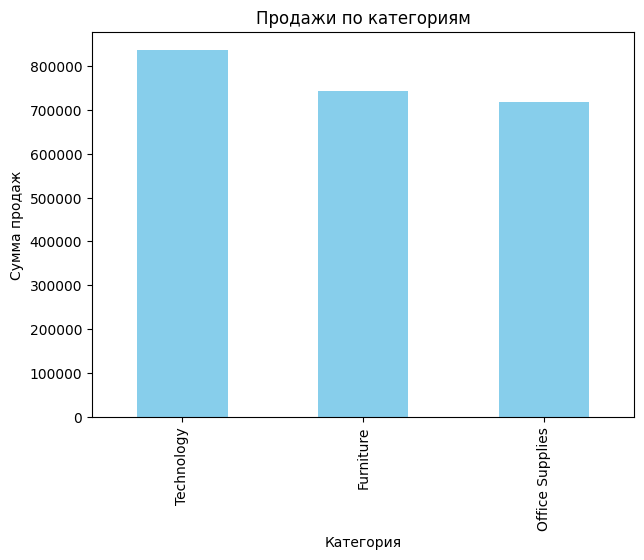

In [13]:
category_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending = False)

category_sales.plot(kind = 'bar', figsize=(7,5), color = 'skyblue', title = 'Продажи по категориям', ylabel = 'Сумма продаж', xlabel = 'Категория')
plt.savefig("images/category_sales.png", dpi=150, bbox_inches='tight')
plt.show

Вывод:
- Лучше всего продается Technology
- Хуже всего продается Office Supplies

### 5.2 Прибыль по категориям

<function matplotlib.pyplot.show(close=None, block=None)>

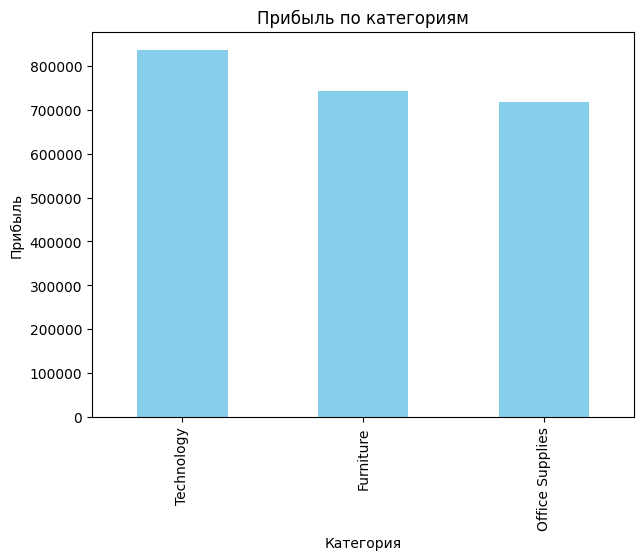

In [14]:
category_profit = df.groupby('Category')['Profit'].sum().sort_values(ascending = False)

category_sales.plot(kind = 'bar', figsize=(7,5), color = 'skyblue', title = 'Прибыль по категориям', ylabel = 'Прибыль', xlabel = 'Категория')
plt.savefig("images/category_profit.png", dpi=150, bbox_inches='tight')
plt.show

### 5.3 Прибыль по подкатегориям

<function matplotlib.pyplot.show(close=None, block=None)>

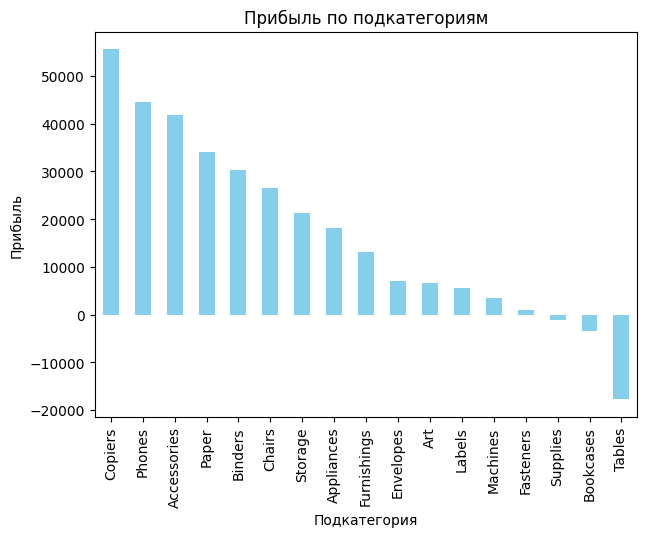

In [15]:
sub_category_profit = df.groupby('Sub-Category')['Profit'].sum().sort_values(ascending = False)
sub_category_profit.plot(kind = 'bar', figsize=(7,5), color ='skyblue', title = 'Прибыль по подкатегориям', xlabel = 'Подкатегория', ylabel = 'Прибыль')
plt.savefig("images/sub_category_profit.png", dpi=150, bbox_inches='tight')
plt.show

Вывод:
Убыточные подкатегории:
-Tables
-Bookcases
-Supplies

Эти категории требуют пересмотра цен, скидок или исключения из ассортимента

### 5.4 Продажи по регионам

<function matplotlib.pyplot.show(close=None, block=None)>

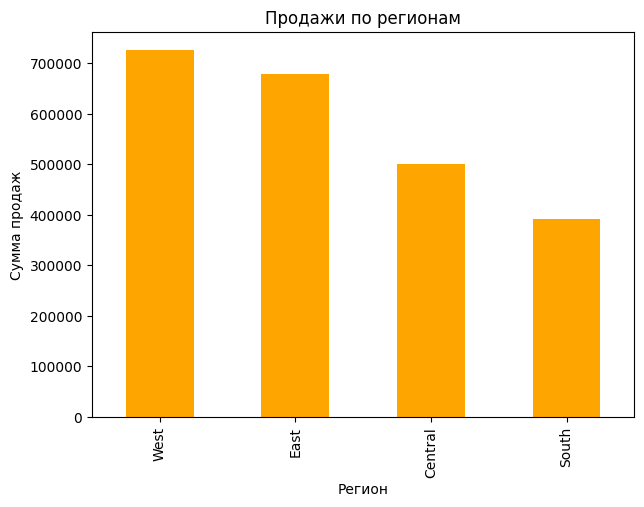

In [16]:
region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending = False)

region_sales.plot(kind = 'bar', figsize=(7,5), color ='orange', title = 'Продажи по регионам', ylabel = 'Сумма продаж', xlabel = 'Регион')
plt.savefig("images/region_sales.png", dpi=150, bbox_inches='tight')
plt.show

### 5.5 Прибыль по регионам

<function matplotlib.pyplot.show(close=None, block=None)>

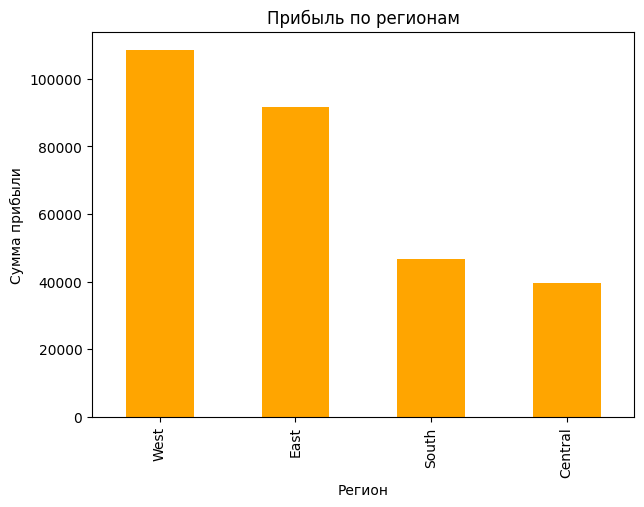

In [17]:
region_profit = df.groupby('Region')['Profit'].sum().sort_values(ascending = False)

region_profit.plot(kind = 'bar', figsize=(7,5), color ='orange', title = 'Прибыль по регионам', ylabel = 'Сумма прибыли',xlabel = 'Регион')
plt.savefig("images/region_profit.png", dpi=150, bbox_inches='tight')
plt.show

### 5.6 Топ 10 продуктов по продажам

<function matplotlib.pyplot.show(close=None, block=None)>

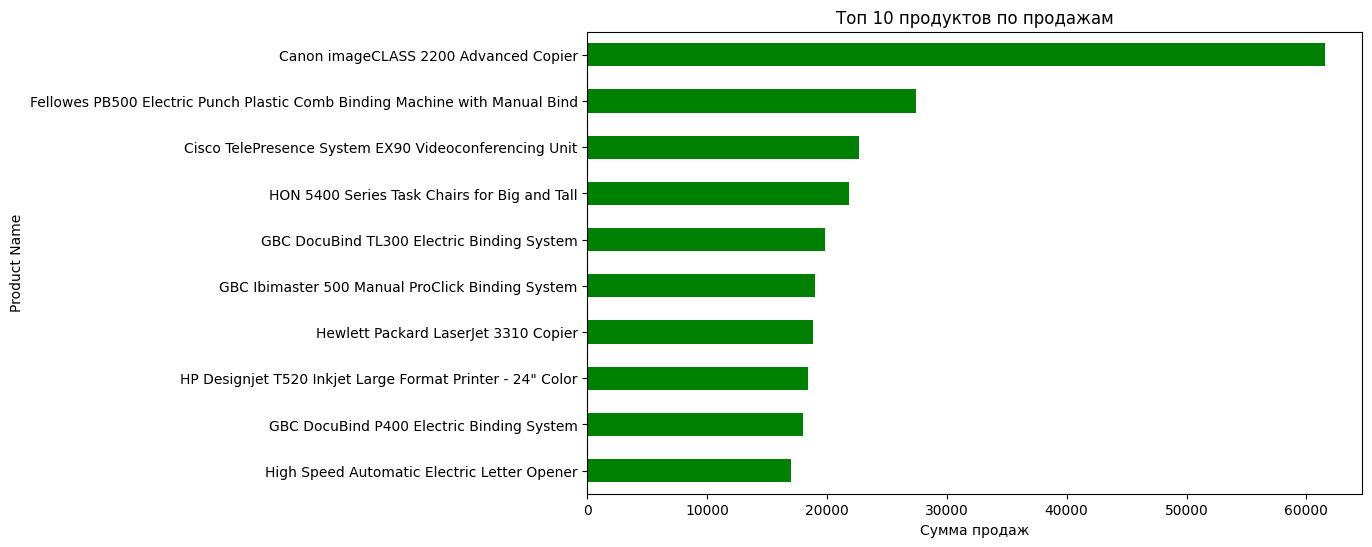

In [18]:
top_product = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)

top_product.plot(kind = 'barh', figsize= (10,6), color = 'green', title = 'Топ 10 продуктов по продажам')
plt.xlabel('Сумма продаж')
plt.gca().invert_yaxis()
plt.savefig("images/top_product.png", dpi=150, bbox_inches='tight')
plt.show

### 5.7 Динамика продаж

<function matplotlib.pyplot.show(close=None, block=None)>

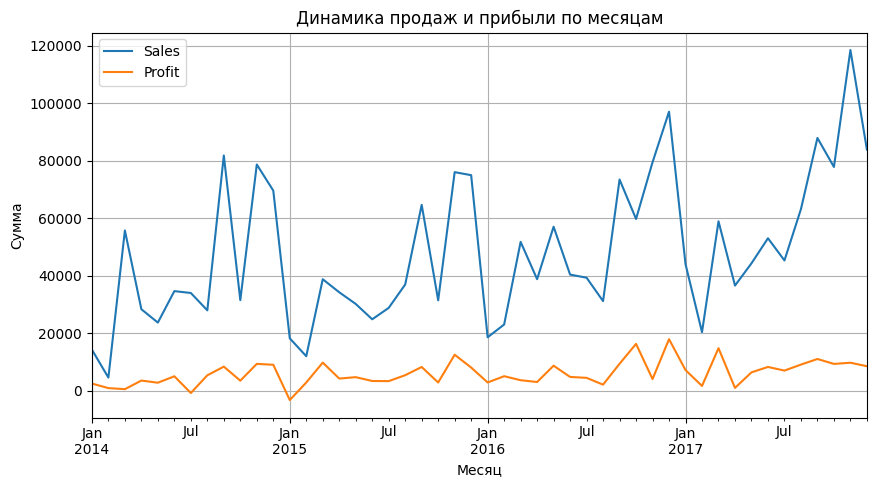

In [19]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

monthly = df.groupby(df['Order Date'].dt.to_period('M'))[['Sales', 'Profit']].sum()

monthly.plot(figsize=(10,5), title = 'Динамика продаж и прибыли по месяцам', xlabel = 'Месяц', ylabel = 'Сумма', grid = True)
plt.savefig("images/monthly.png", dpi=150, bbox_inches='tight')
plt.show


## 6. Детальный анализ

### 6.1. Как категории влияют на прибыль?
 • Технологии приносят наибольшую прибыль и имеют лучшую маржинальность.
 • Мебель в целом даёт низкую или отрицательную прибыль из-за подкатегории Tables.
 • Канцтовары стабильны, но не сверхприбыльны.

### 6.2. Сезонность

Анализ по месяцам показывает пики продаж:
 • Ноябрь–декабрь (праздничный период).
 • Минимальные продажи — июль.

### 6.3. Проблемные зоны
 • Высокие скидки резко уменьшают прибыль (мощная зависимость).
 • Несколько подкатегорий систематически убыточны (Tables — самый большой минус).
 • Центральный регион проседает по прибыли.

## 7. Итоговые выводы

Краткое резюме:
 • Продажи растут год от года, но прибыль нестабильна.
 • Маржа низкая — 12.47%.
 • Убыточные подкатегории “съедают” значительную часть прибыли.
 • Технологии — основной драйвер выручки и прибыли.
 • Центральный регион — слабое звено.
 • Высокие скидки почти всегда ведут к убыткам.

Рекомендации:
 • Пересмотреть стратегию скидок.
 • Оптимизировать категорию Furniture, особенно Tables.
 • Укреплять продажи в South.
 • Увеличивать долю Technology.